In [2]:
import matplotlib.pyplot as plt
from qubo_divided import solve_qubo_by_dividing


import numpy as np

import itertools

def calculate_QUBO_explicitely(Q):
    d = len(Q)

    bitstrings = list(map(np.array, list(itertools.product([0, 1], repeat=d))))

    values = []

    for bitstring in bitstrings:
        values.append(bitstring @ Q @ bitstring)

    return min(values), bitstrings[np.argmin(values)]




#2 * np.random.rand(d, d) - 1

In [3]:
N = 23
b = np.random.randint(-2000,2000,size=(N,N))
b_symm = (b + b.T)/2


In [4]:
#calculate_QUBO_explicitely(b)

# 

# General symmteric matrix

In [5]:
d = 3

A, B, C, D, E, F = 5, 4, 2, 3, 1, 0


Q = np.array([  [ A, B, C], 
                [ B, D, E],
                [ C, E, F]])

# HA-assignment for 4 teams

In [6]:
Q = np.array(  [[ 0, 4,-2, 2, 4, 0],
                [ 4,-4, 4, 4, 0,-4],
                [-2, 4,-2, 0, 4,-2],
                [ 2, 0, 0,-6, 4, 2],
                [-4, 0, 4, 4,-4, 4],
                [ 0,-4,-2, 4, 4, 0]]) 

d = 6

In [7]:


min_energy, min_bistring = solve_qubo_by_dividing(
    Q,
    learning_rate=0.1,
    shots=500,
    updates=40,
    d_per_computer=d,
)

print(Q)
#print("Algo:", min_energy, min_bistring)





print("Exact solution:", calculate_QUBO_explicitely(Q))

parity: 0


KeyboardInterrupt: 

In [8]:
d = 6

bitstrings = list(map(np.array, list(itertools.product([0, 1], repeat=d))))

values = []

for bitstring in bitstrings:
    values.append(bitstring @ Q @ bitstring)


In [9]:
print( [ bitstrings[idx] for idx in np.where( values == min(values) )[0] ])
print( [ values[idx] for idx in np.where( values == min(values) )[0] ])

[array([0, 1, 0, 0, 0, 1])]
[-12]


In [10]:
z = np.array([1,0,0,1,0,0])

In [11]:
def setup_labels(z, num_teams):
    '''
    create dict of team pair - z value eg. { "12" : z_1, "13" : z_2 ...}

    z - iterable: 
    num_teams - int: 
    '''
    
    combos = []

    for i in range(0, num_teams - 1 ):
        for j in range(i, num_teams):
            if i != j:
                combos.append( str(i) + str(j) )
    return dict( zip(combos, z ) )

In [12]:
setup_labels(z, 4)      

{'01': 1, '02': 0, '03': 0, '12': 1, '13': 0, '23': 0}

In [13]:
from copy import deepcopy

def ha_assign(timetable, z):

    assert isinstance(timetable,np.ndarray), "Timetable must be of type np.ndarray"

    ha_assignment = (np.ones_like(timetable) * -1)   # -1 for debug
    num_teams = timetable.shape[0]
    num_games = 2 * (num_teams-1)
    
    assert num_teams * (num_teams  - 1)/2 == len(z), "z vector not compatible with number of teams"
    z_labeled = setup_labels(z, num_teams)      
    
    for t_row in range( num_teams ):
        for slot in range( num_games ):
            team_1 = deepcopy(t_row)
            team_2 = timetable[t_row, slot]

            #print(team_1, team_2)
            if team_1 > team_2:
                team_1, team_2 = team_2, team_1     # slot is in the second half of the tournament team1 is greater than team2, switch them
                label = str(team_1) + str(team_2)   # create label for lookup
                #print(label + "if")
                if slot >= (num_teams - 1):       # slot is in the second half of the tournament
                    a = z_labeled[ label ]      # 'a' is the 1 or 0 home assignment value,      y_t',s' = z
                
                else:                           # slot is in the first half of the tournament
                    a = 1 - z_labeled[ label ]                                                # y_t',s  = 1-z
                

            else:                                   # the order of teams matches the label
                label = str(team_1) + str(team_2)
                #print(label + "else")
                
                if slot >= (num_teams - 1):       # slot is in the second half of the tournament
                    a =  1 - z_labeled[ label ]                                                # y_t,s' = 1-z
                
                else:                           # slot in the first half of the tournament
                    a = z_labeled[ label ]                                                    # y_t,s  = z
                
            
            ha_assignment[t_row, slot] = a #!

    return ha_assignment

In [15]:
timetable = np.array([[2,3,4,2,3,4],
                      [1,4,3,1,4,3],
                      [4,1,2,4,1,2],
                      [3,2,1,3,2,1]])

ha = ha_assign(timetable - 1 , np.array([0,0,0,0,0,0]))
print(ha, "\n\n",timetable -1)

[[0 0 0 1 1 1]
 [1 0 0 0 1 1]
 [0 1 1 1 0 0]
 [1 1 1 0 0 0]] 

 [[1 2 3 1 2 3]
 [0 3 2 0 3 2]
 [3 0 1 3 0 1]
 [2 1 0 2 1 0]]


In [16]:
def count_breaks(timetable, z):
    ha = ha_assign(timetable, z)

    breaks = 0
    for t_row in range(ha.shape[0]):
        for slot in range(ha.shape[1]-1):
            breaks += ha[t_row, slot] * ha[t_row, slot + 1] + (1 - ha[t_row,slot]) * ( 1 - ha[t_row, slot + 1])

    return breaks

In [17]:

z = bitstrings[17]

#count_breaks(tt, )

In [18]:
"""tt2 = np.array([[2,3,4,5,6,2,3,4,5,6],
                 [1,5,6,4,3,1,5,6,4,3],
                 [4,1,5,6,2,4,1,5,6,2],
                 [3,6,1,2,5,3,6,1,2,5],
                 [6,2,3,1,4,6,2,3,1,4],
                 [5,4,2,3,1,5,4,2,3,1]])

ha_assign(tt2, np.ones(15))"""

'tt2 = np.array([[2,3,4,5,6,2,3,4,5,6],\n                 [1,5,6,4,3,1,5,6,4,3],\n                 [4,1,5,6,2,4,1,5,6,2],\n                 [3,6,1,2,5,3,6,1,2,5],\n                 [6,2,3,1,4,6,2,3,1,4],\n                 [5,4,2,3,1,5,4,2,3,1]])\n\nha_assign(tt2, np.ones(15))'

In [19]:
breaks_list = []
for  z in bitstrings:
    breaks_list.append( count_breaks(timetable -1 , z) )



KeyError: '10'

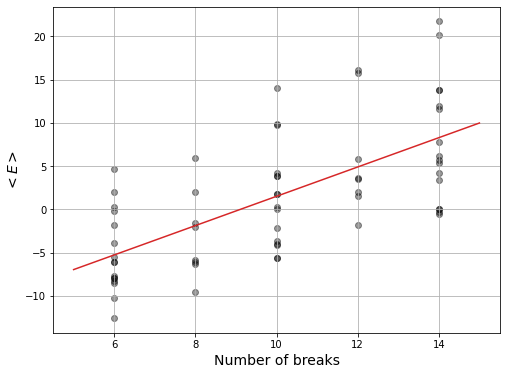

In [35]:
 

plt.figure(figsize=[8,6])
plt.grid()
plt.scatter( breaks_list, np.array(values) + 0.3 * np.random.normal(size = np.array(values).shape), alpha = .4, color = "black")
plt.xlabel("Number of breaks", size = 14)
plt.ylabel("$<E>$", size = 14)

popt = np.polyfit(breaks_list, values, 1)
_t = np.linspace(min(breaks_list) - 1, max(breaks_list) + 1, 100)
plt.plot(_t, popt[0] * _t + popt[1], color = "tab:red")
#plt.savefig("/home/user/mnt/project/src/energy-breaks2.png", dpi = 200)    

In [31]:
import pandas as pd
df = pd.DataFrame()
df["breaks_list"] = breaks_list
df["energy"] = values
df["bitstrings"] = bitstrings
df

,breaks_list,energy,bitstrings
0,14,0,"[0, 0, 0, 0, 0, 0]"
1,14,0,"[0, 0, 0, 0, 0, 1]"
2,10,-4,"[0, 0, 0, 0, 1, 0]"
3,14,4,"[0, 0, 0, 0, 1, 1]"
4,8,-6,"[0, 0, 0, 1, 0, 0]"
...,...,...,...
59,8,6,"[1, 1, 1, 0, 1, 1]"
60,14,8,"[1, 1, 1, 1, 0, 0]"
61,10,2,"[1, 1, 1, 1, 0, 1]"
62,14,20,"[1, 1, 1, 1, 1, 0]"


In [29]:
import plotly.express as px

fig = px.scatter(x = breaks_list, 
            y = np.array(values) + 0.3 * np.random.normal(size = np.array(values).shape),
            hover_data = [bitstrings])

fig.write_html("/home/user/mnt/project/src/px_break_energy_diagram.html")
fig

In [43]:
import pandas as pd

pd.DataFrame( {"breaks": breaks_list, "E": values} ).groupby("breaks").mean()

,E
breaks,
6,-3.0
8,-4.0
10,0.0
12,0.0
14,5.0


In [109]:
np.where( np.array(breaks_list) == min(breaks_list) )

(array([12, 13, 17, 18, 19, 21, 25, 29, 34, 38, 42, 44, 45, 46, 50, 51]),)

In [100]:
max(breaks_list)

14

In [101]:
breaks_list[19], bitstrings[19]

(6, array([0, 1, 0, 0, 1, 1]))